
<img src="./picture/Screenshot 2023-05-21 095503.png" alt="drawing" width="1600"/>

_“Last night I fell asleep in a satellite dish. My dreams were broadcast all over the world.”<br> -Steven Wright_

## __Import__

In [2]:
import pandas as pd
df = pd.read_excel('./UCS-Satellite-Database-5-1-2022.xls')


## __Name of Satellite__
Before launching a satellite, we need to give the satellite a name, and here are the most common names.

In [3]:
df['Current Official Name of Satellite'] = df['Current Official Name of Satellite'].replace(
    '[0-9-]', ' ', regex=True)


In [4]:
Names = df['Current Official Name of Satellite'].str.split(
    expand=True).stack().value_counts()
Names


Starlink    2219
OneWeb       427
Dove         194
USA          164
SpaceBEE     151
            ... 
iSat           1
ISX            1
ITU            1
pSAT           1
Z              1
Length: 981, dtype: int64

In [5]:
from pyecharts.charts import WordCloud
from pyecharts import options as opts
words = Names.to_dict() #  type dict input
words


{'Starlink': 2219,
 'OneWeb': 427,
 'Dove': 194,
 'USA': 164,
 'SpaceBEE': 151,
 'A': 137,
 'Lemur': 124,
 'B': 116,
 'FM': 112,
 'F': 111,
 'Cosmos': 95,
 'Yaogan': 86,
 'Next': 75,
 'Iridium': 73,
 'C': 65,
 'M': 63,
 'D': 56,
 'Beidou': 49,
 's': 48,
 'Jilin': 45,
 'x': 44,
 'Gaofen': 44,
 'ORBCOMM': 35,
 'p': 34,
 'Intelsat': 32,
 'Globalstar': 32,
 'Eutelsat': 30,
 'Galileo': 28,
 'E': 28,
 'Shijian': 28,
 'DW': 26,
 'ÑuSat': 25,
 'v': 24,
 'FOC': 24,
 'X': 23,
 'b': 22,
 'SkySat': 21,
 'O': 20,
 'Gonets': 18,
 'Kepler': 18,
 'k': 17,
 'Aerocube': 17,
 'Zhongxing': 16,
 'GSAT': 16,
 'ICEYE': 15,
 'Tianqi': 15,
 'SES': 15,
 'BlackSky': 14,
 'Express': 14,
 'S': 14,
 'Astra': 14,
 'Shiyan': 14,
 'GaoFen': 14,
 'NZ': 13,
 'Galaxy': 13,
 'Echostar': 13,
 'Tyvak': 13,
 'Global': 13,
 'R': 13,
 'Hawk': 12,
 '.': 12,
 'INMARSAT': 12,
 'G': 12,
 'COSMIC': 11,
 'IGS': 11,
 'a': 10,
 'Astrocast': 10,
 'JCSat': 10,
 'Sirius': 10,
 'West': 10,
 'Ningxia': 10,
 'TDRS': 10,
 'V': 10,
 'CartoSat

The above code does a good job of splitting some common words,<br>
 but there are also some words of single character length that we need to remove.

In [6]:
words = {k: v for k, v in words.items() if len(k) > 1}
words


{'Starlink': 2219,
 'OneWeb': 427,
 'Dove': 194,
 'USA': 164,
 'SpaceBEE': 151,
 'Lemur': 124,
 'FM': 112,
 'Cosmos': 95,
 'Yaogan': 86,
 'Next': 75,
 'Iridium': 73,
 'Beidou': 49,
 'Jilin': 45,
 'Gaofen': 44,
 'ORBCOMM': 35,
 'Intelsat': 32,
 'Globalstar': 32,
 'Eutelsat': 30,
 'Galileo': 28,
 'Shijian': 28,
 'DW': 26,
 'ÑuSat': 25,
 'FOC': 24,
 'SkySat': 21,
 'Gonets': 18,
 'Kepler': 18,
 'Aerocube': 17,
 'Zhongxing': 16,
 'GSAT': 16,
 'ICEYE': 15,
 'Tianqi': 15,
 'SES': 15,
 'BlackSky': 14,
 'Express': 14,
 'Astra': 14,
 'Shiyan': 14,
 'GaoFen': 14,
 'NZ': 13,
 'Galaxy': 13,
 'Echostar': 13,
 'Tyvak': 13,
 'Global': 13,
 'Hawk': 12,
 'INMARSAT': 12,
 'COSMIC': 11,
 'IGS': 11,
 'Astrocast': 10,
 'JCSat': 10,
 'Sirius': 10,
 'West': 10,
 'Ningxia': 10,
 'TDRS': 10,
 'CartoSat': 9,
 'Fengyun': 9,
 'AprizeSat': 9,
 'SAR': 8,
 'AMC': 8,
 'DirecTV': 8,
 'IRNSS': 8,
 'Capella': 8,
 'Yunhai': 8,
 'Prometheus': 8,
 'OHS': 8,
 'Star': 8,
 'Sentinel': 8,
 'Tevel': 8,
 'XJS': 8,
 'TJS': 8,
 'Ti

In [7]:
from pyecharts.charts import WordCloud
from pyecharts import options as opts

wordcloud = WordCloud()
wordcloud.add("", words.items(), word_size_range=[20, 100], shape='circle')
wordcloud.set_global_opts()
wordcloud.render("Word Cloud.html")
wordcloud.render_notebook()  # try render_notebook function


'f:\\FINAL\\Word Cloud.html'

## __Country of Operator/Owner__

In this part, associate mission counts with countries.

In [2]:
import pandas as pd
df = pd.read_excel('./UCS-Satellite-Database-5-1-2022.xls')


In [3]:
Countries = df['Country of Operator/Owner'].value_counts()
Countries


USA                           3415
China                          535
United Kingdom                 486
Russia                         170
Japan                           88
                              ... 
Jordan                           1
United Kingdom/Netherlands       1
Laos                             1
Morocco/Germany                  1
China/Italy                      1
Name: Country of Operator/Owner, Length: 108, dtype: int64

Correct names

In [4]:
df['Country of Operator/Owner'] = df['Country of Operator/Owner'].str.split(
    '/')
df = df.explode('Country of Operator/Owner')
df = df.replace('USA', 'United States')  # USA -> United States
df = df.replace('UK', 'United Kingdom')  # UK -> United Kingdom
Countries = df['Country of Operator/Owner'].value_counts()

Countries


United States     3449
China              540
United Kingdom     491
Russia             173
Japan               97
                  ... 
Bangladesh           1
Laos                 1
Iran                 1
Ecuador              1
Jordan               1
Name: Country of Operator/Owner, Length: 78, dtype: int64

Check countrie name

In [11]:
with open('./print.txt', 'w') as file:
    for i in list(Countries.to_dict()):
        print(i, '\n', file=file)


In [12]:
from pyecharts.charts import Map
from pyecharts import options as opts

map_chart = (
    Map()
    .add("Country", [list(z) for z in Countries.items()], "world")
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Country"),
        visualmap_opts=opts.VisualMapOpts(max_=500),
    )
)
map_chart.render("World Map.html")
map_chart.render_notebook()


try __MapGlobe__

In [13]:
import pyecharts.options as opts
from pyecharts.charts import MapGlobe

data = [[k, v] for k, v in Countries.to_dict().items()]
low, high = min(list(Countries.to_dict().values())), max(
    list(Countries.to_dict().values()))
c = (
    MapGlobe()
    .add_schema()
    .add(
        maptype="world",
        series_name="World Population",
        data_pair=data,
        is_map_symbol_show=False,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(
            min_=low,
            max_=high,  # set max and min to correct range_text
            range_text=["max", "min"],
            is_calculable=True,
            range_color=["lightskyblue", "yellow", "orangered"],
        )
    )
    .render("Map Globe Base.html")
)


## __Users and Purpose__

In [14]:
import pandas as pd
df = pd.read_excel('./UCS-Satellite-Database-5-1-2022.xls')
up = pd.concat([df['Users'], df['Purpose']], axis=1).dropna()
up


,Users,Purpose
0,Commercial,Earth Observation
1,Civil,Technology Development
2,Civil,Earth Observation
3,Commercial,Communications
4,Commercial,Communications
...,...,...
5460,Government,Earth Observation
5461,Government,Earth Observation
5462,Government,Earth Observation
5463,Government,Earth Observation


In [15]:
up['Users'] = up['Users'].str.split('/')
up = up.explode('Users')
up['Purpose'] = up['Purpose'].str.split('/')
up = up.explode('Purpose')
up


,Users,Purpose
0,Commercial,Earth Observation
1,Civil,Technology Development
2,Civil,Earth Observation
3,Commercial,Communications
4,Commercial,Communications
...,...,...
5460,Government,Earth Observation
5461,Government,Earth Observation
5462,Government,Earth Observation
5463,Government,Earth Observation


C:\Users\Siegelth\AppData\Roaming\Python\Python310\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


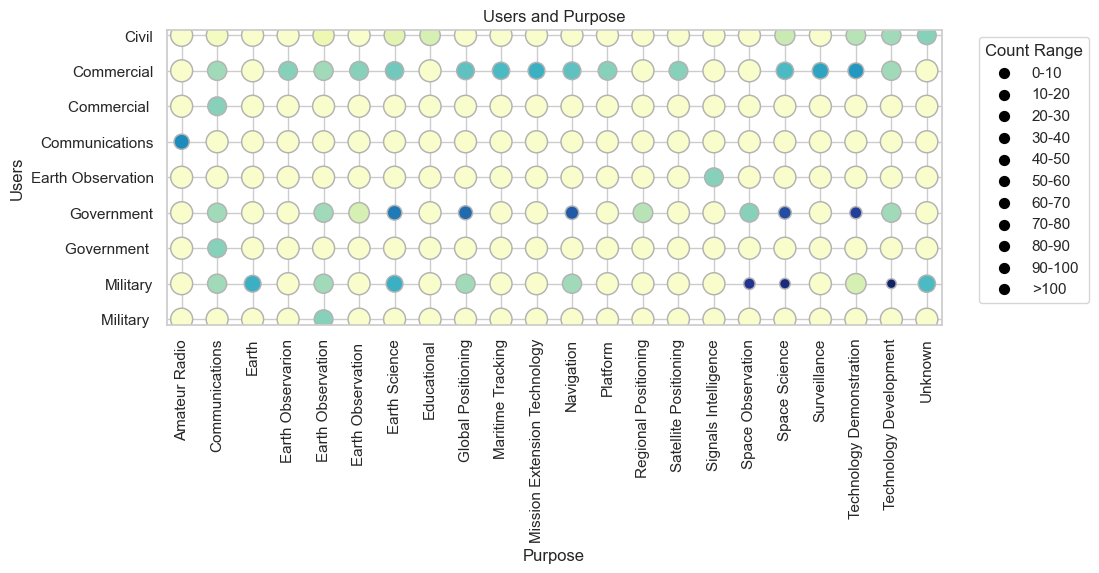

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the Excel file into a DataFrame
df = pd.read_excel('./UCS-Satellite-Database-5-1-2022.xls')

# Extract the 'Users' and 'Purpose' columns and drop rows with missing values
up = pd.concat([df['Users'], df['Purpose']], axis=1).dropna()

# Split the 'Users' column values by '/' and explode the resulting lists into separate rows
up['Users'] = up['Users'].str.split('/')
up = up.explode('Users')

# Split the 'Purpose' column values by '/' and explode the resulting lists into separate rows
up['Purpose'] = up['Purpose'].str.split('/')
up = up.explode('Purpose')

# Set the plot style
sns.set_theme(style="whitegrid")

# Group the data by 'Users' and 'Purpose', calculate the size of each group, and reshape it into a matrix
heatmap_data = up.groupby(['Users', 'Purpose']).size().unstack(fill_value=0)

# Replace count values greater than 100 with a special marker
heatmap_data = heatmap_data.where(heatmap_data <= 100, '>100')

# Define the count range labels for the legend
count_ranges = ['0-10', '10-20', '20-30', '30-40', '40-50',
                '50-60', '60-70', '70-80', '80-90', '90-100', '>100']

# Create the scatter plot using seaborn's scatterplot
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(
    data=heatmap_data.stack().reset_index(name='count'),
    x='Purpose',
    y='Users',
    hue='count',
    size='count',
    palette='YlGnBu',
    sizes=(50, 250),
    edgecolor='.7',
    ax=ax,
    vmin=0,  # Set the lower threshold value
    vmax=100,  # Set the upper threshold value
    markers={'>100': 'X'},  # Set marker for count > 100
)

# Tweak the plot to finalize
ax.set(xlabel='', ylabel='', aspect='equal')
ax.margins(.02)
for label in ax.get_xticklabels():
    label.set_rotation(90)

# Add title and labels to the plot
plt.title('Users and Purpose')
plt.xlabel('Purpose')
plt.ylabel('Users')

# Create a custom legend with count range labels
legend_elements = [plt.scatter(
    [], [], marker='o', color='black', s=50, label=label) for label in count_ranges]
plt.legend(handles=legend_elements, title='Count Range',
           loc='upper right', bbox_to_anchor=(1.2, 1))

# Display the plot
plt.show()


## __Country and Purpose__

In [17]:
import pandas as pd

# Read the Excel file into a DataFrame
df = pd.read_excel('./UCS-Satellite-Database-5-1-2022.xls')

# Extract the 'Users' and 'Purpose' columns and drop rows with missing values
cp = pd.concat([df['Country of Operator/Owner'],
               df['Purpose']], axis=1).dropna()

df['Country of Operator/Owner'] = df['Country of Operator/Owner'].str.split(
    '/')
df = df.explode('Country of Operator/Owner')
cp


,Country of Operator/Owner,Purpose
0,USA,Earth Observation
1,Finland,Technology Development
2,Denmark,Earth Observation
3,Multinational,Communications
4,Multinational,Communications
...,...,...
5460,China,Earth Observation
5461,China,Earth Observation
5462,China,Earth Observation
5463,China,Earth Observation


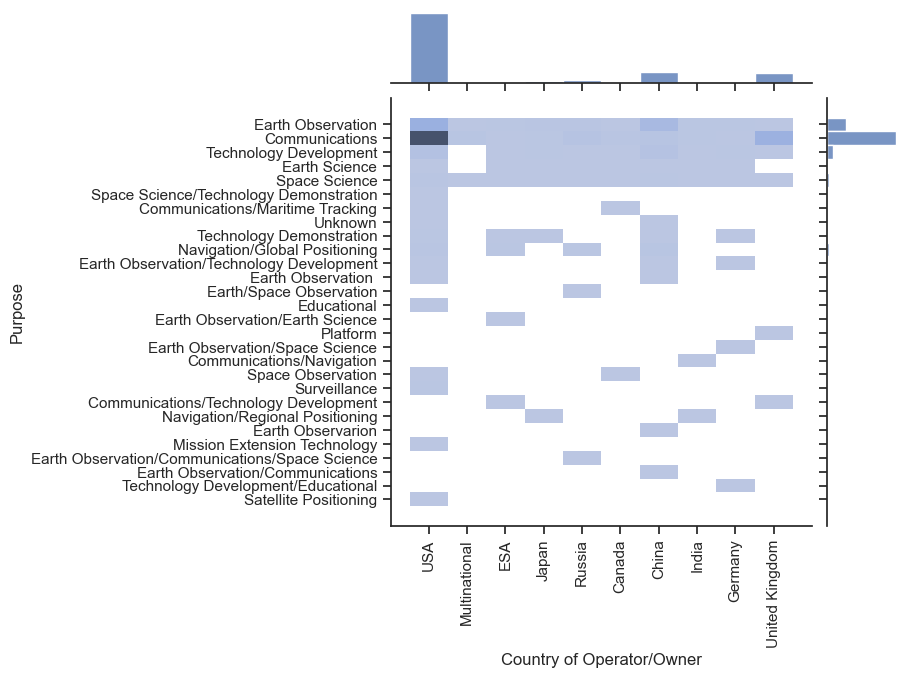

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count the counts of countries
country_counts = df['Country of Operator/Owner'].value_counts()

# Only the first ten countries are retained
top_countries = country_counts.head(10).index.tolist()

# Filter data and create unions and marginal histograms
df_filtered = df[df['Country of Operator/Owner'].isin(top_countries)]
sns.set(style="ticks")
joint = sns.jointplot(x='Country of Operator/Owner',
                      y='Purpose', data=df_filtered, kind="hist")
plt.xticks(rotation=90)
plt.show()


## __Date of Launch__

In [19]:
import pandas as pd
df = pd.read_excel('./UCS-Satellite-Database-5-1-2022.xls')


In [20]:
date = df.sort_values(by='Date of Launch')
date = date['Date of Launch']
date = date.dropna()
date = date.reset_index(drop=True)


<Axes: >

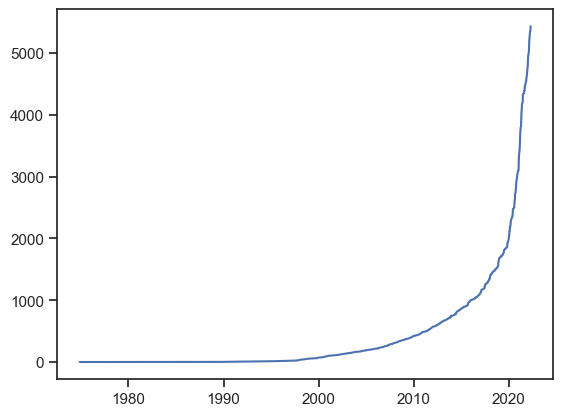

In [21]:
import seaborn as sns
sns.lineplot(x=date.values, y=date.index)

## __Class of Orbit__

![image.png](./picture/Orbitsmarintek-600x450.jpg)

In [5]:
import pandas as pd
df = pd.read_excel('./UCS-Satellite-Database-5-1-2022.xls')


In [6]:
df['Class of Orbit'].value_counts()

LEO           4700
GEO            565
MEO            140
Elliptical      60
Name: Class of Orbit, dtype: int64

In [8]:
from pyecharts.charts import Pie
from pyecharts import options as opts

x_data = df['Class of Orbit'].value_counts().index
y_data = df['Class of Orbit'].value_counts()
pie = Pie()
pie.add("", [list(z) for z in zip(x_data, y_data)])
pie.set_global_opts(title_opts=opts.TitleOpts(title="Class of Orbit"))
pie.render("Class of Orbit.html")
pie.render_notebook()  # try render_notebook


## __Type of Orbit__

In [25]:
import pandas as pd
df = pd.read_excel('./UCS-Satellite-Database-5-1-2022.xls')


make data easier to observe

In [10]:
index = df['Type of Orbit'].dropna().value_counts().index
count = df['Type of Orbit'].dropna().value_counts().values


numpy.ndarray

In [27]:
from pyecharts.charts import Bar
from pyecharts import options as opts
import pandas as pd

bar = (
    Bar()
    .add_xaxis(index.tolist())  # pandas.core.indexes.base.Index -> list
    .add_yaxis('Count', count.tolist())  # numpy.ndarray -> list
    .set_global_opts(title_opts=opts.TitleOpts(title='Orbit Types'))
)
bar.render('./Type Bar Chart.html')
bar.render_notebook()


## __Plot orbit__

![image.png](./picture/R-C.gif)

In [14]:
import numpy as np

# Define orbital parameters
rp = 566 # Perigee (km) 
ra = 576 # Apogee (km)
i = 36.9 # Inclination (degrees)
e = (ra - rp) / (ra + rp) # Eccentricity

$$a = \frac{r_p + r_a}{2}$$

In [13]:
a = (rp + ra) / 2 # Semi-major axis (km)

$$b = a \sqrt{1 - e^2}$$ 

In [15]:
b = a * np.sqrt(1 - e**2)  # Semi-minor axis (km)


$$\theta = \frac{1}{2} \pi$$

In [16]:
# Generate orbit coordinates
theta = np.linspace(0, 2 * np.pi, 100) # Angle from perigee


$$ r = \frac{a(1 - e^2)}{1 + e*\cos(\theta)} $$

In [17]:

r = (a * (1 - e**2)) / (1 + e * np.cos(theta)) # Radius

$$ z = r\sin(\frac{i\pi}{180}) $$

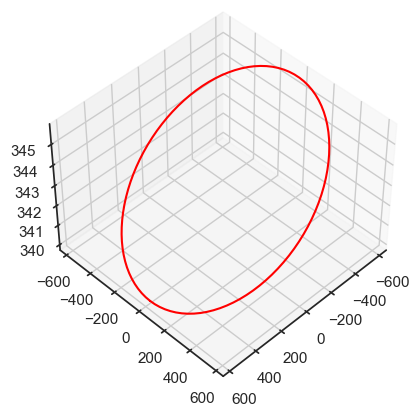

In [31]:
x = r * np.cos(theta) # X coordinate
y = r * np.sin(theta) # Y coordinate
z = r * np.sin(i * np.pi / 180) # Z coordinate

import matplotlib.pyplot as plt
# Plot Earth and orbit
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, color='red') # Plot orbit

ax.view_init(elev=45, azim=45) # elev，azim


In [32]:
rp = df['Perigee (km)'].loc[df['Current Official Name of Satellite'] == 'Shijian 6A']
ra = df['Apogee (km)'].loc[df['Current Official Name of Satellite'] == 'Shijian 6A']
i = df['Inclination (degrees)'].loc[df['Current Official Name of Satellite'] == 'Shijian 6A']


<img src="./picture/R-C.png" alt="drawing" width="600"/>

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_excel('./UCS-Satellite-Database-5-1-2022.xls')

def Plot_orbit(orbit_name):
    # Define orbital parameters
    rp = df['Perigee (km)'].loc[df['Current Official Name of Satellite']
                                == orbit_name]
    ra = df['Apogee (km)'].loc[df['Current Official Name of Satellite']
                               == orbit_name]
    i = df['Inclination (degrees)'].loc[df['Current Official Name of Satellite'] == orbit_name]
    rp = rp.iloc[0]
    ra = ra.iloc[0]
    i = i.iloc[0]

    e = (ra - rp) / (ra + rp)  # Eccentricity
    a = (rp + ra) / 2  # Semi-major axis (km)
    b = a * np.sqrt(1 - e**2)  # Semi-minor axis (km)

    # Generate orbit coordinates
    theta = np.linspace(0, 2 * np.pi, 100)  # Angle from perigee
    r = (a * (1 - e**2)) / (1 + e * np.cos(theta))  # Radius
    x = r * np.cos(theta)  # X coordinate
    y = r * np.sin(theta)  # Y coordinate
    z = r * np.sin(i * np.pi / 180)  # Z coordinate

    # Plot Earth and orbit
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, y, z, color='red')  # Plot orbit
    plt.show()


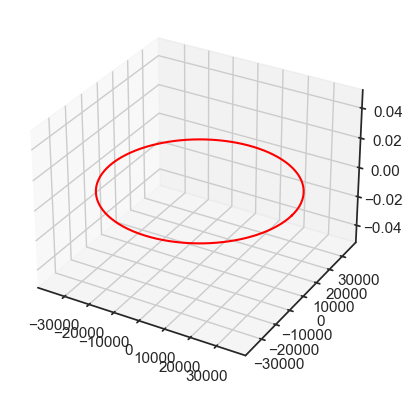

In [34]:
Plot_orbit('GovSat-1')

## __Predict__

In [35]:
df = pd.read_excel('./UCS-Satellite-Database-5-1-2022.xls')
data = pd.concat([df['Launch Mass (kg.)'],df['Perigee (km)'],df['Apogee (km)'],df['Eccentricity'],df['Period (minutes)'],], axis=1)
data.dropna(inplace=True)
data

,Launch Mass (kg.),Perigee (km),Apogee (km),Eccentricity,Period (minutes)
0,22.0,566.0,576.0,0.000720,96.08
1,4.5,497.0,517.0,0.001454,94.70
2,1.0,442.0,687.0,0.017665,95.90
3,6330.0,35778.0,35793.0,0.000178,1436.03
4,1800.0,35700.0,35700.0,0.000000,1436.10
...,...,...,...,...,...
5460,2650.0,748.0,758.0,0.000702,99.80
5461,2650.0,500.0,504.0,0.000291,94.70
5462,2630.0,487.0,500.0,0.000947,94.49
5463,2630.0,487.0,499.0,0.000874,94.50


package
* pytorch
* tensorboard

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter
import pandas as pd
from torchvision import transforms

# Read the data
df = pd.read_excel('./UCS-Satellite-Database-5-1-2022.xls')

# Extract features and label
data = pd.concat([df['Launch Mass (kg.)'], df['Perigee (km)'],
                 df['Apogee (km)'], df['Eccentricity'], df['Period (minutes)']], axis=1)
data.dropna(inplace=True)

# Define a custom dataset class


class CustomDataset(Dataset):
    def __init__(self, data):
        self.features = data.iloc[:, 1:].values
        self.labels = data.iloc[:, 0].values

    def __len__(self):
        return len(self.features)

    def __getitem__(self, index):
        feature = self.features[index]
        label = self.labels[index]
        return feature, label


# Create a custom dataset object
dataset = CustomDataset(data)

# Data normalization
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5, 0.5])
])

# Divide the training and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(
    dataset, [train_size, test_size])

# Create a data loader
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


**R**ecurrent **N**eural **N**etworks.  

**RNN** is a class of recursive neural network that takes sequence data as input, performs recursion in the direction of sequence evolution, and all recurrent units are connected in a chain-like manner.


<img src="./picture/Recurrent_Neural_Network_1440-32.jpg" alt="drawing" width="600"/>

In [36]:
# Define the model
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size,
                          num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(
            device)  # If CUDA is available, use CUDA
        # Modify the input dimensions here
        out, _ = self.rnn(x.unsqueeze(1), h0)
        out = self.fc(out[:, -1, :])
        return out


# Set the training parameters
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_size = 4  # Set according to the number of features of the data
hidden_size = 32
num_layers = 2
output_size = 1

# Create a model instance
model = RNN(input_size, hidden_size, num_layers, output_size).to(device)

# Define loss functions and optimizers
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

# Defines TensorBoard's SummaryWriter
writer = SummaryWriter()

# Train the model
num_epochs = 100
total_step = len(train_loader)

for epoch in range(num_epochs):
    for i, (features, labels) in enumerate(train_loader):
        features = features.to(device)
        labels = labels.to(device)

        # Forward propagation
        outputs = model(features.float())
        loss = criterion(outputs, labels.float())

        # Back propagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Record the loss value of the training process
        writer.add_scalar('Train Loss', loss.item(), epoch * total_step + i)

        if (i + 1) % 100 == 0:
            print(
                f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{total_step}], Loss: {loss.item()}')

# Evaluate the model
model.eval()
with torch.no_grad():
    total_loss = 0
    total_samples = 0
    for features, labels in test_loader:
        features = features.to(device)
        labels = labels.to(device)
        outputs = model(features.float())
        loss = criterion(outputs, labels.float())
        total_loss += loss.item() * len(features)
        total_samples += len(features)
    average_loss = total_loss / total_samples
    print(f'Test Loss: {average_loss}')

writer.close()


C:\Users\Siegelth\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/100], Step [100/131], Loss: 5014573.0


C:\Users\Siegelth\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [2/100], Step [100/131], Loss: 1090914.0
Epoch [3/100], Step [100/131], Loss: 918860.75
Epoch [4/100], Step [100/131], Loss: 1803226.0
Epoch [5/100], Step [100/131], Loss: 2709958.0
Epoch [6/100], Step [100/131], Loss: 2427215.5
Epoch [7/100], Step [100/131], Loss: 2399808.25
Epoch [8/100], Step [100/131], Loss: 1359723.75
Epoch [9/100], Step [100/131], Loss: 4020468.25
Epoch [10/100], Step [100/131], Loss: 4219624.0
Epoch [11/100], Step [100/131], Loss: 11503965.0
Epoch [12/100], Step [100/131], Loss: 11246480.0
Epoch [13/100], Step [100/131], Loss: 3634976.0
Epoch [14/100], Step [100/131], Loss: 738921.625
Epoch [15/100], Step [100/131], Loss: 2220071.75
Epoch [16/100], Step [100/131], Loss: 2449892.25
Epoch [17/100], Step [100/131], Loss: 2885227.0
Epoch [18/100], Step [100/131], Loss: 748919.0
Epoch [19/100], Step [100/131], Loss: 3632004.0
Epoch [20/100], Step [100/131], Loss: 6894821.5
Epoch [21/100], Step [100/131], Loss: 232860.0
Epoch [22/100], Step [100/131], Loss: 4055

C:\Users\Siegelth\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([19])) that is different to the input size (torch.Size([19, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


![image.png](./picture/Screenshot%20(73).png)

![image.png](./picture/Screenshot%20(74).png)

# __Ending__

###### _"We choose to go to the moon in this decade and do the other things, not because they are easy, but because they are hard; because that goal will serve to organize and measure the best of our energies and skills, because that challenge is one that we are willing to accept, one we are unwilling to postpone, and one which we intend to win, and the others, too."_


<br> * Github URL here -> https://github.com/Siegelth/Data_Analyze <br>

<img src="./picture/WeChat Image_20230522105409.png" alt="drawing" width="300"/>